# Datan havainnollistamiseksi

In [4]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from viivanleveys import *


plt.interactive(False)



def read_csv(filename):
    return np.genfromtxt(filename, delimiter=',')

## usemman kubitin systeemi

In [5]:
data1= read_csv("../q_lkm0-2.csv")
data2= read_csv("../q_lkm3.csv")


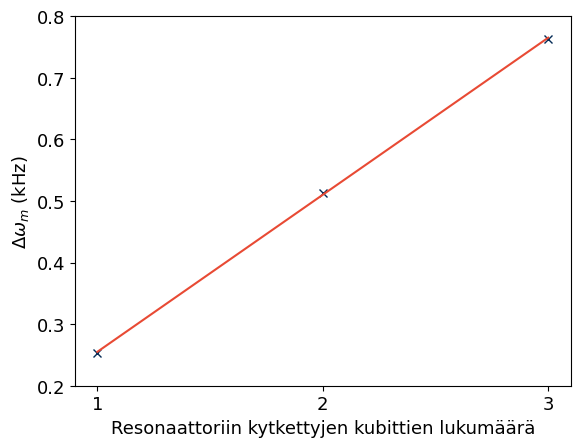

In [6]:
plt.rcParams['axes.titlesize'] = 36
f = []
i=2
while i < len(data1):
    freq = np.array(data1[i])
    power = np.array(data1[i+1])
    f.append(viivanleveys(freq,power)[1])
    i = i + 2
freq = np.array(data2[0])
power = np.array(data2[1])
#plt.plot(freq, power)
f.append(viivanleveys(freq,power)[1])


lkm = [1,2,3]
deltaf= np.array(f[0:])+1000
plt.plot(lkm, deltaf , 'x', color='#042b56')

m, b = np.polyfit(lkm, deltaf, 1)
plt.plot(lkm, m*np.array(lkm) + b, color='#e84a34')

plt.xlabel("Resonaattoriin kytkettyjen kubittien lukumäärä", fontsize=13)
plt.ylabel("$\Delta \omega_m$ (kHz)", fontsize=13)
plt.xticks(np.arange(1, 4, 1.0), fontsize=13)
plt.yticks(np.arange(0.2, 0.9, 0.1), fontsize=13)
plt.savefig('lkm_f'+'.pdf',dpi=300, bbox_inches = 'tight') 
plt.show()


## Kytkentävakion vaikutus

In [8]:
data3 = read_csv("../fwhm_max_g.csv")

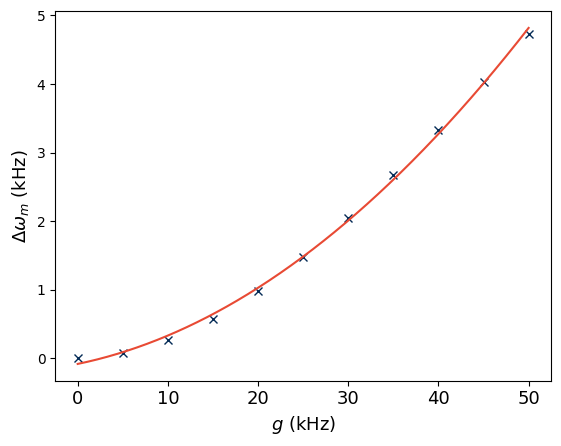

In [9]:
g = (data3[0][::2])/(2*np.pi)
deltaf = np.array(data3[2][::2])-data3[2][0]
plt.plot(g, deltaf, 'x', color='#042b56')

a, b, c = np.polyfit(g, deltaf, 2)
plt.plot(np.linspace(0,50,500), a*np.linspace(0,50,500)**2+b*np.linspace(0,50,500)+ c, color='#e84a34')

plt.xlabel("$g$ (kHz)", fontsize=13)
plt.ylabel("$\Delta \omega_m$ (kHz)", fontsize=13)
plt.xticks(np.arange(0, 60, 10), fontsize=13)
#plt.yticks(np.arange(0, 0.2, 0.025), fontsize=13)
plt.savefig('g_f'+'.pdf',dpi=300, bbox_inches = 'tight') 
plt.show()

## kappa vaikutus

In [11]:
data4= read_csv("../X_kappa_0_100.csv")

0.6627999971167581 0.015164822527488188


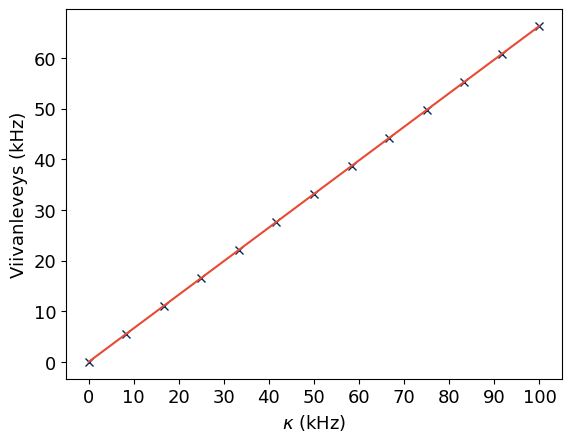

In [16]:
viivanleveydet= []
i=0
while i < len(data4):
    freq = data4[i]
    power = data4[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    i = i + 4
#plt.grid()
#plt.show()
plt.plot(np.linspace(0,100,13), viivanleveydet, 'x', color='#042b56')

a, b = np.polyfit(np.linspace(0,100,13), viivanleveydet, 1)
print(a,b)
plt.plot(np.linspace(0,100,26), a*np.linspace(0,100,26) + b, color='#e84a34')

plt.xlabel("$\kappa$ (kHz)", fontsize=13)
plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xticks(np.arange(0, 110, 10), fontsize=13)
plt.yticks( fontsize=13)
plt.savefig('k_fwhm'+'.pdf',dpi=300, bbox_inches = 'tight')
plt.show()


## gamma vaikutus

### $\sigma_x$ viivanleveyteen

In [17]:
data5= read_csv("../sx_s.csv")

0.3175658892076923 0.09009223261537672


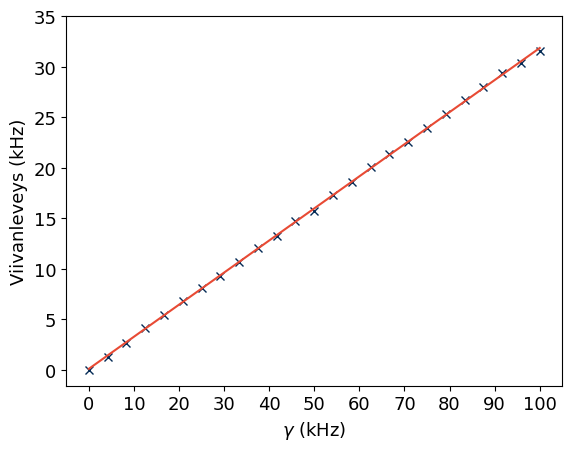

In [18]:
viivanleveydet= []
i=0
while i < len(data5):
    freq = data5[i]
    power = data5[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    i = i + 2
#plt.grid()
#plt.show()
#viivanleveydet[0]= 0.01
plt.plot(np.linspace(0,100,25), viivanleveydet, 'x', color='#042b56')

a, b = np.polyfit(np.linspace(0,100,25), viivanleveydet, 1)
print(a,b)
plt.plot(np.linspace(0,100,100), a*np.linspace(0,100,100) + b, color='#e84a34')

plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xlabel("$\gamma$ (kHz)", fontsize=13)
plt.xticks(np.arange(0, 110, 10), fontsize=13)
plt.yticks(np.arange(0, 40, 5), fontsize=13)
plt.savefig('g_fwhm'+'.pdf',dpi=300, bbox_inches = 'tight')
plt.show()
 

### Resonaattorin viivanleveyteen

In [19]:
data6= read_csv("../X_s_iso.csv")
data7= read_csv("../X_s_pieni.csv")
data8 = read_csv("../X_30_100.csv")

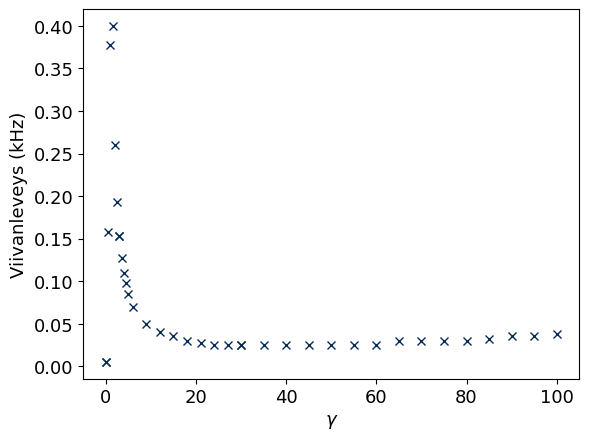

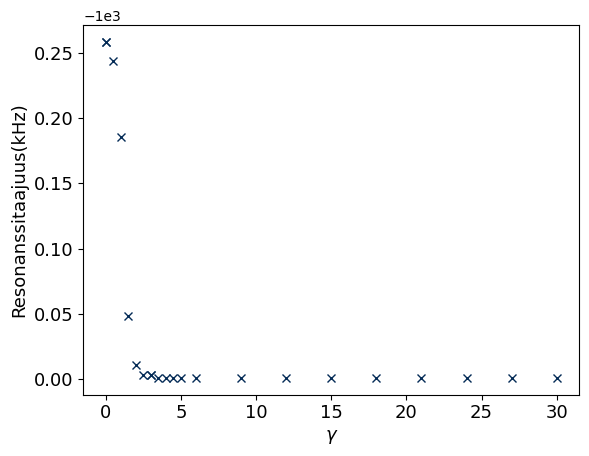

In [20]:
viivanleveydet= []
paikka =[]
i=0
while i < len(data6):
    freq = data6[i]
    power = data6[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    paikka.append(viivanleveys(freq,power)[1])
    i = i + 2
i=0
while i < len(data7):
    freq = data7[i]
    power = data7[i+1]
    #plt.plot(freq, power)
    viivanleveydet.append(viivanleveys(freq,power)[0])
    paikka.append(viivanleveys(freq,power)[1])
    i = i + 2    

    
plt.plot([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30], viivanleveydet[0:11], 'x', color='#042b56')
plt.plot([ 0,  0.5, 1.,  1.5, 2.,  2.5, 3.,  3.5, 4.,  4.5, 5. ], viivanleveydet[11:], 'x', color='#042b56')


plt.plot(data8[0], data8[1], 'x', color='#042b56')
#a, b = np.polyfit(np.linspace(0,1,11), viivanleveydet, 1)
#plt.plot(np.linspace(0,1,100), a*np.linspace(0,1,100) + b)


plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xlabel("$\gamma$", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('g_fwhm_res'+'.pdf',dpi=300, bbox_inches = 'tight')
#plt.xlim(1.5,10)
#plt.yscale("log")


plt.show()


plt.plot([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30], paikka[0:11], 'x', color='#042b56')
plt.plot([ 0,  0.5, 1.,  1.5, 2.,  2.5, 3.,  3.5, 4.,  4.5, 5. ], paikka[11:], 'x', color='#042b56')
plt.ylabel("Resonanssitaajuus(kHz)", fontsize=13)
plt.xlabel("$\gamma$", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Mittausajan vaikutus

In [23]:
eka = read_csv("../tulos_0_5.csv")
toka = read_csv("../tulos_5_10.csv")
kolmas = read_csv("../tulos_15_60.csv")
neljäs = read_csv("../tulos_65_100.csv")

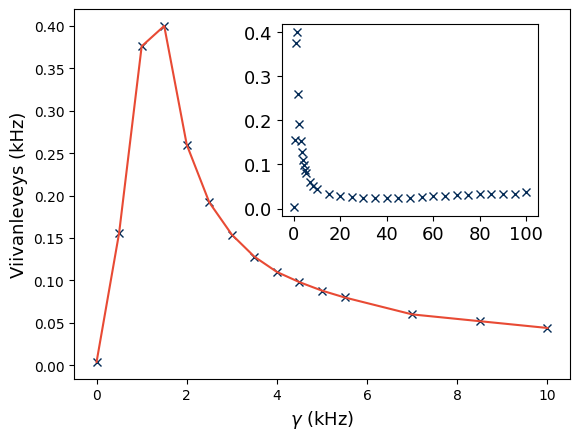

In [26]:
# Generate data for the zoomed portion
X_detail = eka[0].tolist()+toka[0][::3].tolist()
Y_detail = eka[1].tolist()+toka[1][::3].tolist()

plt.plot(X_detail, Y_detail, 'x',  color='#042b56')
plt.plot(X_detail, Y_detail, color='#e84a34')

plt.ylabel("Viivanleveys (kHz)", fontsize=13)
plt.xlabel("$\gamma$ (kHz)", fontsize=13)

# location for the zoomed portion 
sub_axes = plt.axes([.45, .45, .4, .4])
sub_axes.plot(eka[0],eka[1],'x', color='#042b56')
sub_axes.plot(toka[0][::3],toka[1][::3],'x', color='#042b56')
sub_axes.plot(kolmas[0],kolmas[1],'x', color='#042b56')
sub_axes.plot(neljäs[0],neljäs[1],'x', color='#042b56')


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('g_fwhm_res'+'.pdf',dpi=300, bbox_inches = 'tight')
#plt.xlim(1.5,10)
#plt.yscale("log")
plt.show()

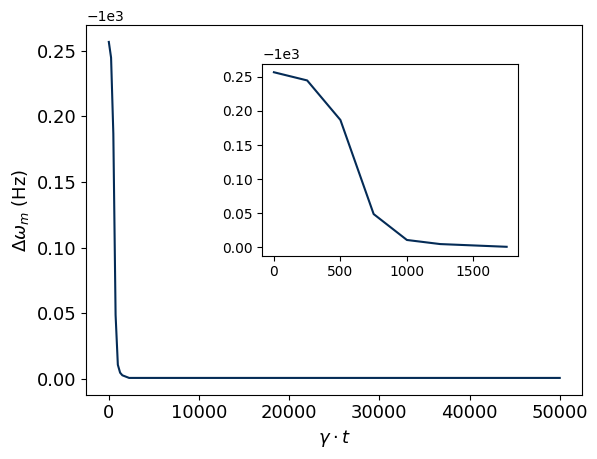

In [27]:
e = (eka[0][:6].tolist()+eka[0][6::3].tolist()+toka[0][::3].tolist()+kolmas[0].tolist()+neljäs[0].tolist())
multiple = 500
e = [x*multiple for x in e]
t = eka[2][:6].tolist()+eka[2][6::3].tolist()+toka[2][::3].tolist()+kolmas[2].tolist()+neljäs[2].tolist()
plt.plot(e,t, color='#042b56')


plt.ylabel("$\Delta \omega_m$ (Hz)", fontsize=13)
plt.xlabel("$\gamma\cdot t $", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)




# Generate data for the zoomed portion
X_detail = eka[0][:8]*500
Y_detail = eka[2][:8]


 # location for the zoomed portion 
sub_axes = plt.axes([.4, .4, .4, .4]) 

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail,  color='#042b56') 
plt.savefig('gamma_deltaf2'+'.pdf',dpi=300, bbox_inches = 'tight')

plt.show()